<a href="https://colab.research.google.com/github/hongkuntian/comp551-applied-machine-learning/blob/master/project1/miniproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style='whitegrid', palette="deep", font_scale=0.8)

SEED = 51  # Arbitraty seed used for random operations

# Data

Set URLs for datasets on github

In [0]:
iono_url = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/ionosphere.data'
adult_url_data = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/adult.data'
adult_url_test = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/adult.test'
mushroom_url = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/agaricus-lepiota.data'
bank_url = 'https://raw.githubusercontent.com/hongkuntian/comp551-applied-machine-learning/master/project1/data/bank-additional-full.data'

Define column names

In [0]:
iono_header = None
adult_header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']
mushroom_header = ['edibility','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
bank_header = ['age','job','marital','education','default','housing','loan','contact','month','day-of-week','duration','campaign','pdays','previous','poutcome','emp-var-rate','cons-price-idx','cons-conf-idx','euribor3m','num-employed','y']

Import data

In [0]:
df_iono = pd.read_csv(iono_url, header=None)

df_adult_1 = pd.read_csv(adult_url_data, names=adult_header)
df_adult_2 = pd.read_csv(adult_url_test, comment='|', names=adult_header)
df_adult = pd.concat([df_adult_1, df_adult_2], axis=0).reset_index(drop=True)

df_mushroom = pd.read_csv(mushroom_url, names=mushroom_header)

df_bank = pd.read_csv(bank_url, sep=';', names=bank_header, low_memory=False, skiprows=[0])

## Helper functions


In [0]:
# Since we could use train_test_split from scikit-learn, we decided to not use our own method since we don't have a stratified version. 

def split_training_test(df, class_feature, train_frac=0.8, random_state=None, verbose=False):
  train = df.sample(frac=train_frac, random_state=random_state)
  test = df.drop(train.index)
  X_train = train.drop(class_feature, axis=1)
  y_train = np.asarray(train[class_feature], dtype=int)
  X_test = test.drop(class_feature, axis=1)
  y_test = np.asarray(test[class_feature], dtype=int)
  if verbose:
    print("Complete data label distribution:")
    print((df[class_feature].value_counts() / df.shape[0]).head())
    print("Training data label distribution:")
    print((train[class_feature].value_counts() / train.shape[0]).head())
    print("Test data label distribution:")
    print((test[class_feature].value_counts() / test.shape[0]).head())
  return X_train.values, y_train, X_test.values, y_test

## Ionosphere dataset

In [133]:
df_iono.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [134]:
df_iono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
0     351 non-null int64
1     351 non-null int64
2     351 non-null float64
3     351 non-null float64
4     351 non-null float64
5     351 non-null float64
6     351 non-null float64
7     351 non-null float64
8     351 non-null float64
9     351 non-null float64
10    351 non-null float64
11    351 non-null float64
12    351 non-null float64
13    351 non-null float64
14    351 non-null float64
15    351 non-null float64
16    351 non-null float64
17    351 non-null float64
18    351 non-null float64
19    351 non-null float64
20    351 non-null float64
21    351 non-null float64
22    351 non-null float64
23    351 non-null float64
24    351 non-null float64
25    351 non-null float64
26    351 non-null float64
27    351 non-null float64
28    351 non-null float64
29    351 non-null float64
30    351 non-null float64
31    351 non-null float64
32    351 non-null float64
33    35

Check for NaN values

In [135]:
print('Shape:', df_iono.shape)
print('NaN values:')
print(len(df_iono) - df_iono.count())

Shape: (351, 35)
NaN values:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64


In [136]:
df_iono.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


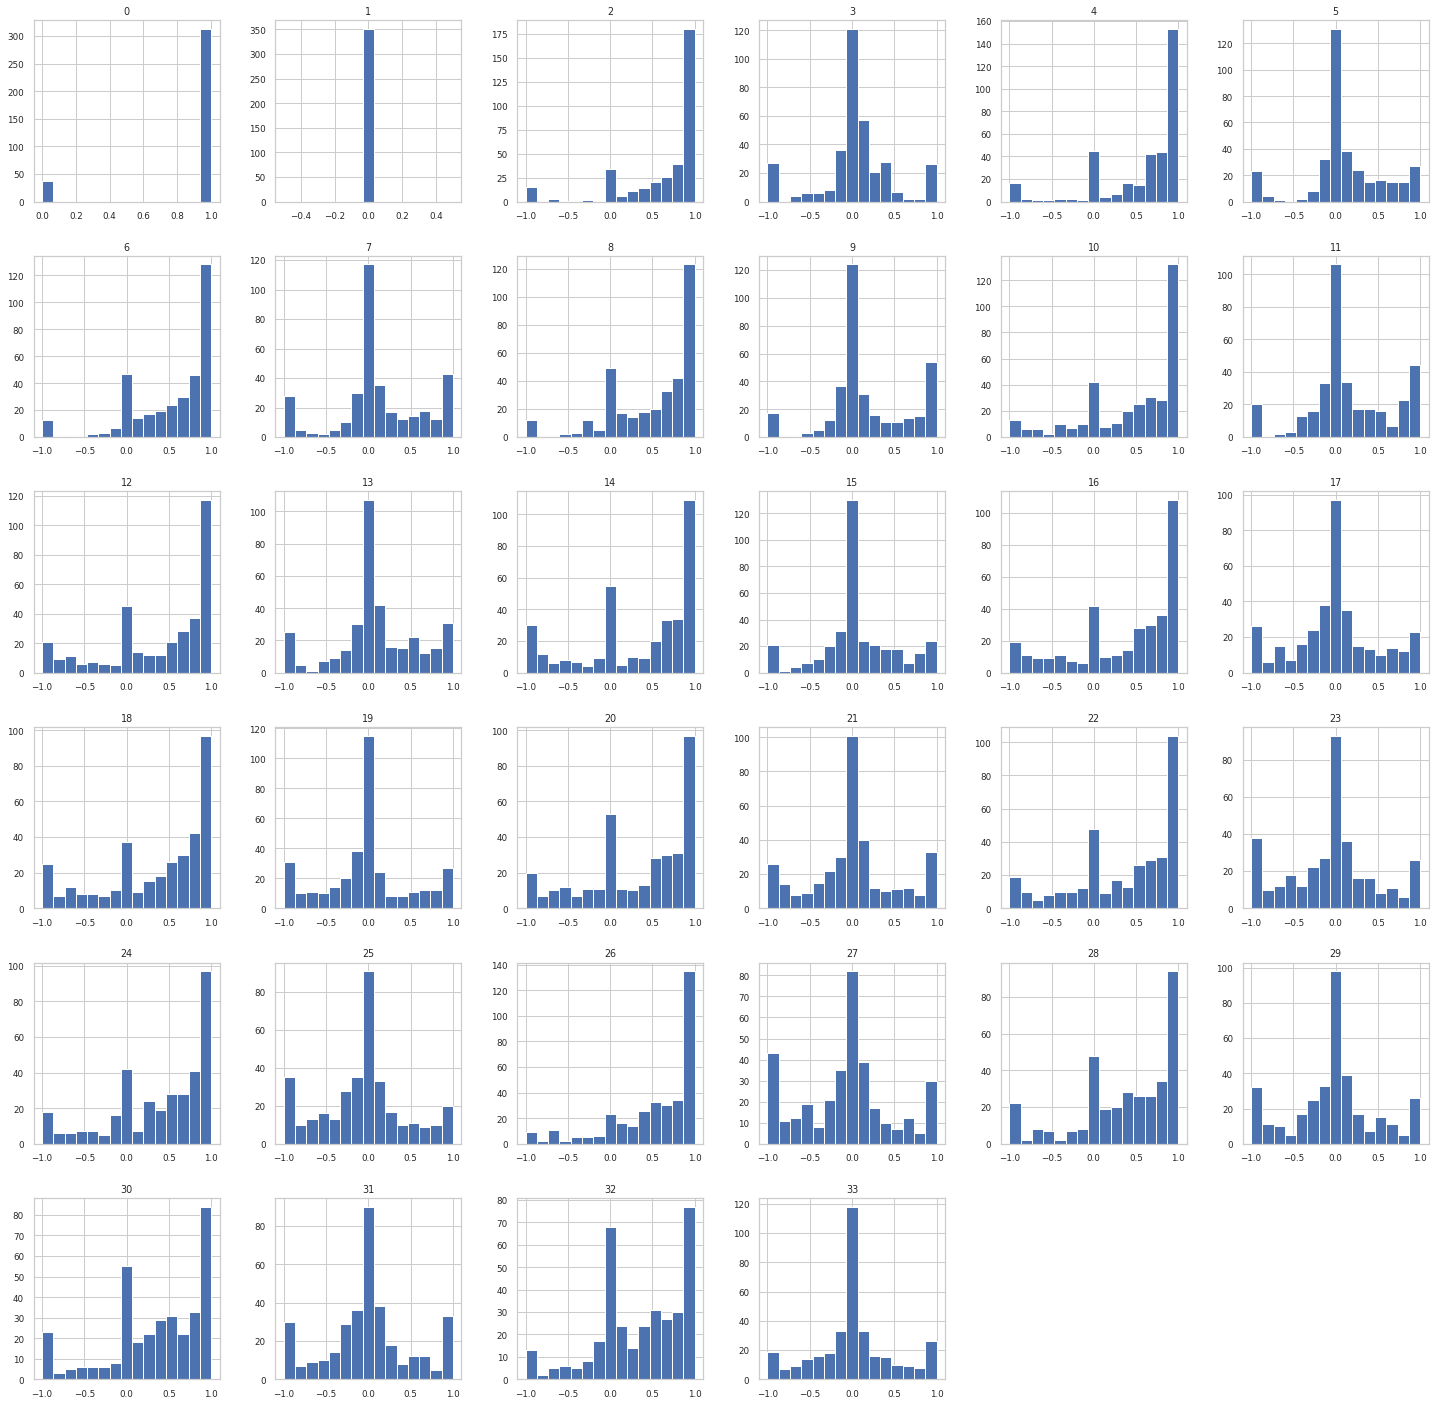

In [137]:
df_iono[:].hist(bins=15, figsize=(25,25), layout=(6,6));

In [138]:
print(df_iono[34].unique())

['g' 'b']


In [0]:
df_iono[34] = (df_iono[34].map({'g':0, 'b':1}))
# df_iono.drop(1, axis=1, inplace=True)
# df_iono.drop([0,1], axis=1, inplace=True)
# df_iono = (df_iono - df_iono.min()) / (df_iono.max() - df_iono.min())

## Adult dataset

In [140]:
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [141]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Let us separate the preprocessing for numerical versus categorical features



In [0]:
numerical = [col for col in df_adult.select_dtypes(include=['int'])]
categorical = [col for col in df_adult.select_dtypes(include=['object'])]

Let us first check if there are missing values in the form of NaNs

In [143]:
print('Shape:', df_adult.shape)
print('NaN values:')
print(len(df_adult) - df_adult.count())

Shape: (48842, 15)
NaN values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [144]:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [145]:
df_adult['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

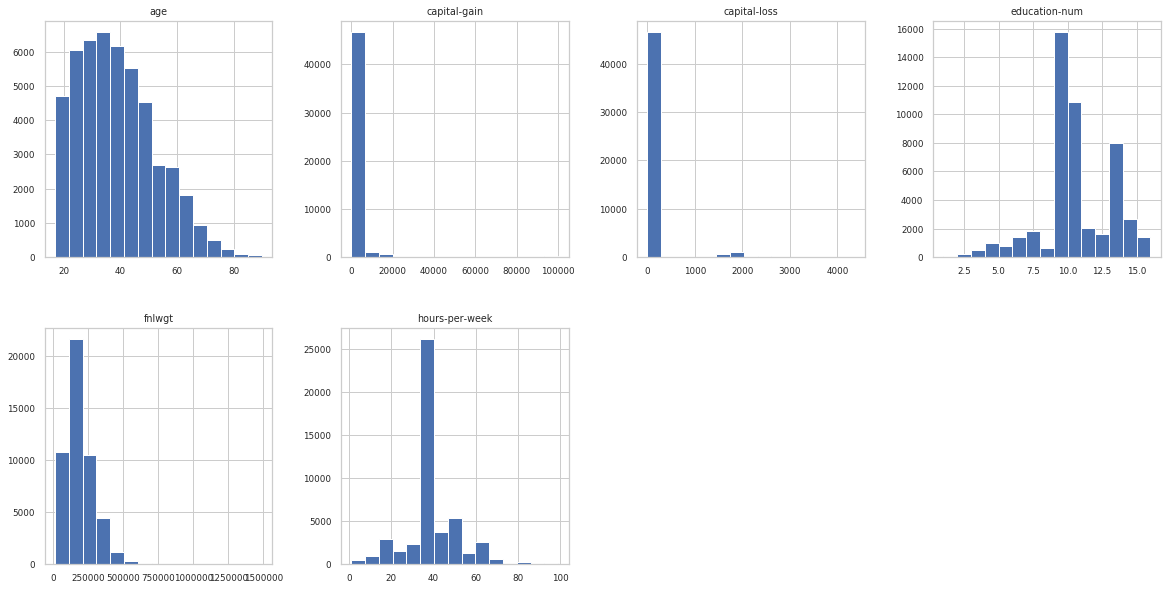

In [146]:
df_adult[numerical].hist(bins=15, figsize=(20,10), layout=(2,4));

It is pretty clear that 'capital-gain' and 'capital-loss' feature predominantly only one number: 0. Let us examine a little further to determine whether we should remove these features.

In [147]:
for feature in numerical:
  print((df_adult[feature].value_counts() / df_adult.shape[0]).head())

36    0.027599
35    0.027374
33    0.027333
23    0.027210
31    0.027128
Name: age, dtype: float64
203488    0.000430
120277    0.000389
190290    0.000389
125892    0.000369
126569    0.000369
Name: fnlwgt, dtype: float64
9     0.323164
10    0.222718
13    0.164305
14    0.054400
11    0.042197
Name: education-num, dtype: float64
0        0.917387
15024    0.010503
7688     0.008394
7298     0.007453
99999    0.004996
Name: capital-gain, dtype: float64
0       0.953278
1902    0.006224
1977    0.005180
1887    0.004770
2415    0.001474
Name: capital-loss, dtype: float64
40    0.466873
50    0.086933
45    0.055628
60    0.044572
35    0.039658
Name: hours-per-week, dtype: float64


These two features have abnormal distributions where over 90% of the data are identical. For this reason, we choose to ommit them since they may not be significantly predictive.

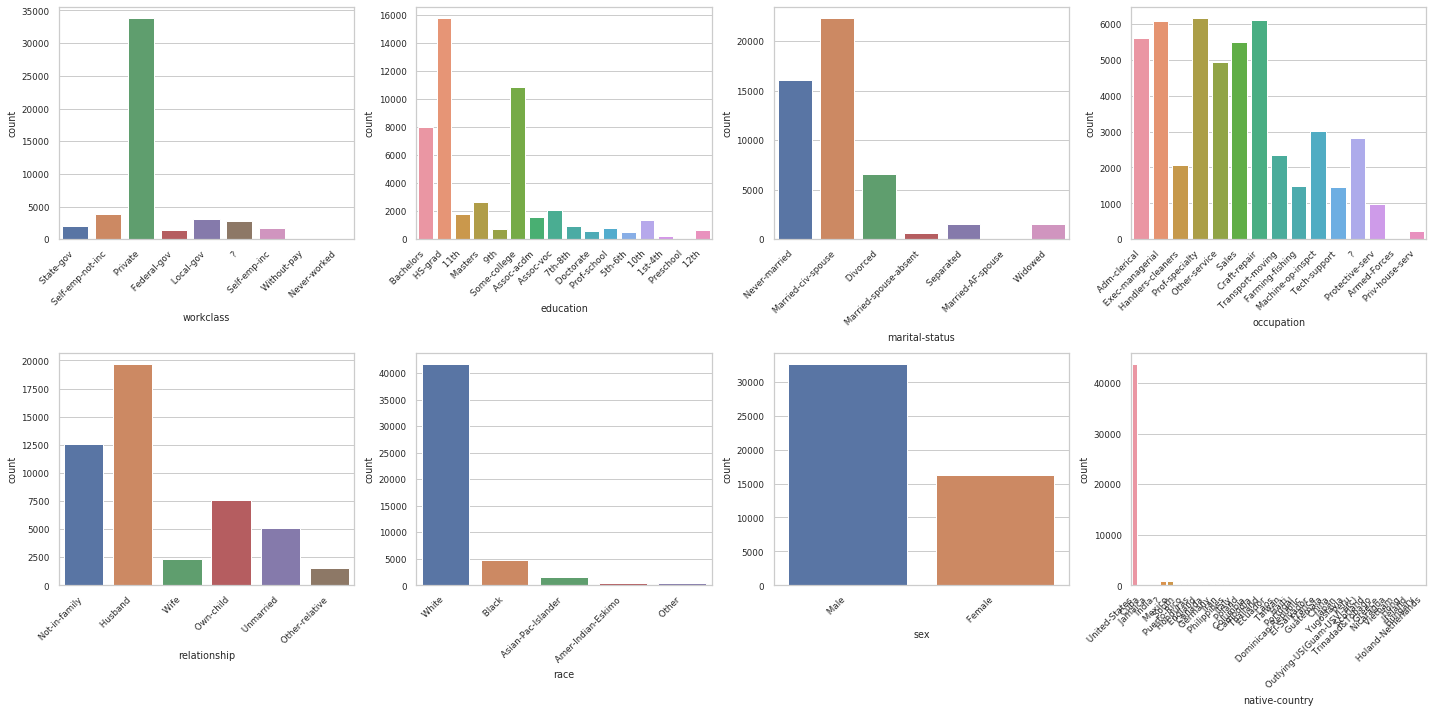

In [148]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
for feature, subplot in zip(categorical, axes.flatten()):
    # df_adult[categorical_feature].value_counts().plot(kind='bar', ax=axes[0 if i <= 4 else 1, i % 4]).set_title(categorical_feature)
    sns.countplot(df_adult[feature], ax=subplot)
    # p.set_xticklabels(axes[0 if i <= 4 else 1, i % 4].get_xticklabels(), rotation=45, horizontalalignment='right')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
fig.tight_layout()

In [149]:
for feature in categorical:
  print(df_adult[feature].unique()) # Unique entries for each categorical feature
  print((df_adult[feature].value_counts() / df_adult.shape[0]).head())  # Top 5 occurence % of categories 

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             0.694198
 Self-emp-not-inc    0.079071
 Local-gov           0.064207
 ?                   0.057307
 State-gov           0.040559
Name: workclass, dtype: float64
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         0.323164
 Some-college    0.222718
 Bachelors       0.164305
 Masters         0.054400
 Assoc-voc       0.042197
Name: education, dtype: float64
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 Married-civ-spouse    0.458192
 Never-married         0.329982
 Divorced              0.135805
 Separated             0.031325
 Widowed               0.031080
Name: marital-status, dtype: float64
[' Adm-clerical' ' Ex

We can notice that the class data has not been cleanly separated into the correct binary classes we need. We will address the typos and map the classes into a single column of 1s and 0s. 

Additionally, we can observe that 'workclass', 'occupation', and 'native-country' feature missing data in the form of a ' ?' string. Given that there aren't many of them, we choose to ommit instances where there are such missing data. 

Finally, the feature 'native-country' has the category ' United-States' more than 90% of the time. This is an abnormal distribution, so we choose to ommit the feature since it may not be particularly predictive of the class.



In [0]:
# def get_continent(country):
#   if country in [' Canada', ' Cuba', ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Haiti', ' Honduras', ' Jamaica', ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Puerto-Rico', ' Trinidad&Tobago', ' United-States']:
#     return 'North-America'
#   elif country in [' England', ' France', ' Germany', ' Greece', ' Holand-Netherlands', ' Hungary', ' Ireland', ' Italy', ' Poland', ' Portugal', ' Scotland', ' Yugoslavia']:
#     return 'Europe'
#   elif country in [' Cambodia', ' China', ' Hong', ' India', ' Iran', ' Japan', ' Laos', ' Philippines', ' Taiwan', ' Thailand', ' Vietnam']:
#     return 'Asia'
#   elif country in [' Columbia', ' Ecuador', ' Peru']:
#     return 'South-America'
#   else:
#     return 'Unknown'

In [151]:
# df_adult.drop(['capital-gain','capital-loss'], axis=1, inplace=True)
# df_adult.drop(['native-country'], axis=1, inplace=True)
# categorical.remove('native-country')
# df_adult['native-country'] = df_adult['native-country'].apply(get_continent)
df_adult['class'] = (df_adult['class'].map({' <=50K':0,' <=50K.':0,' >50K':1,' >50K.':1}))

for feature in categorical:
  df_adult[feature].replace(' ?', np.nan, inplace=True)

df_adult.dropna(inplace=True)

for feature in categorical:
  print(df_adult[feature].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Colu

In [152]:
(df_adult['class'].value_counts() / df_adult.shape[0]).head()

0    0.752156
1    0.247844
Name: class, dtype: float64

In [0]:
df_adult = pd.get_dummies(df_adult, drop_first=True)

In [0]:
df_adult = (df_adult - df_adult.min()) / (df_adult.max() - df_adult.min())

In [155]:
df_adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.119332,0.607897,0.011014,0.020339,0.407531,0.247844,0.068551,0.736522,0.036398,0.083941,0.043032,0.000464,0.035801,0.012759,0.004909,0.009929,0.018199,0.014948,0.033324,0.043320,0.167396,0.012030,0.326898,0.055592,0.001592,0.017359,0.218898,0.000708,0.465592,0.012206,0.322807,0.031202,0.028238,0.000310,0.133121,0.132325,0.032727,0.045243,0.065676,...,0.003604,0.002499,0.001813,0.002941,0.002145,0.000951,0.003251,0.002631,0.000796,0.004268,0.001084,0.001902,0.001526,0.000022,0.000420,0.000619,0.000398,0.003251,0.001238,0.000796,0.002211,0.002278,0.001968,0.000464,0.019968,0.001061,0.000486,0.000995,0.006258,0.001791,0.001371,0.003870,0.000442,0.002233,0.001216,0.000641,0.000575,0.913095,0.001835,0.000509
std,0.181067,0.071527,0.170192,0.075065,0.092965,0.122526,0.431766,0.252691,0.440524,0.187281,0.277303,0.202932,0.021545,0.185796,0.112235,0.069894,0.099149,0.133672,0.121348,0.179484,0.203578,0.373334,0.109019,0.469085,0.229135,0.039870,0.130606,0.413504,0.026592,0.498820,0.109808,0.467555,0.173864,0.165655,0.017592,0.339709,0.338847,0.177924,0.207840

## Mushroom dataset

In [156]:
df_mushroom.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [157]:
df_mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
edibility                   8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises?                    8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Check for NaN values

In [158]:
print('Shape:', df_mushroom.shape)
print('NaN values:')
print(len(df_mushroom) - df_mushroom.count())

Shape: (8124, 23)
NaN values:
edibility                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [0]:
df_mushroom['edibility'] = (df_mushroom['edibility'].map({'e':1, 'p':0}))

In [0]:
df_mushroom = pd.get_dummies(df_mushroom, drop_first=True)
df_mushroom = (df_mushroom - df_mushroom.min()) / (df_mushroom.max() - df_mushroom.min())

In [161]:
df_mushroom.describe()

,edibility,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises?_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.000492,0.387986,0.101920,0.003939,0.450025,0.000492,0.314623,0.399311,0.005416,0.184638,0.226489,0.281142,0.017725,0.001969,0.001969,0.128016,0.131955,0.415559,0.023634,0.265879,0.049237,0.004431,0.434269,0.031512,0.070901,0.070901,0.974151,0.161497,0.309207,0.011817,0.092565,0.090103,0.050222,0.129000,0.007878,0.183653,0.002954,0.060561,0.147957,...,0.023634,0.230428,0.549483,0.000985,0.004431,0.011817,0.070901,0.063023,0.023634,0.230428,0.539636,0.002954,0.011817,0.975382,0.000985,0.921713,0.073855,0.005908,0.159527,0.004431,0.488429,0.200886,0.230428,0.242245,0.005908,0.008863,0.005908,0.293944,0.005908,0.041851,0.049237,0.153619,0.497292,0.210734,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.022185,0.487321,0.302562,0.062641,0.497527,0.022185,0.464394,0.489787,0.073399,0.388028,0.418585,0.449584,0.131959,0.044338,0.044338,0.334128,0.338462,0.492848,0.151914,0.441827,0.216375,0.066425,0.495691,0.174706,0.256675,0.256675,0.158695,0.368011,0.462195,0.108068,0.289840,0.286347,0.218415,0.335221,0.088413,0.387225,0.054276,0.238539,0.355079,...,0.151914,0.421133,0.497576,0.031367,0.066425,0.108068,0.256675,0.243020,0.151914,0.421133,0.498457,0.054276,0.108068,0.154969,0.031367,0.268639,0.261551,0.076644,0.366190,0.066425,0.499897,0.400688,0.421133,0.428468,0.076644,0.093729,0.076644,0.455595,0.076644,0.200262,0.216375,0.360605,0.500023,0.407855,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.

In [162]:
df_mushroom.head()

,edibility,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises?_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Bank dataset

In [163]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day-of-week,duration,campaign,pdays,previous,poutcome,emp-var-rate,cons-price-idx,cons-conf-idx,euribor3m,num-employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Check for NaN values

In [165]:
print('Shape:', df_bank.head().shape)
print('NaN values:')
print(len(df_bank.head()) - df_bank.head().count())

Shape: (5, 21)
NaN values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day-of-week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp-var-rate      0
cons-price-idx    0
cons-conf-idx     0
euribor3m         0
num-employed      0
y                 0
dtype: int64


In [167]:
for feature in df_bank.columns:
  print(df_bank[feature].unique()) # Unique entries for each categorical feature
  print((df_bank[feature].value_counts() / df_bank.shape[0]).head())  # Top 5 occurence % of categories
  print(len(df_bank[feature].unique()))

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
31    0.047271
32    0.044819
33    0.044503
36    0.043216
35    0.042707
Name: age, dtype: float64
78
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.         0.253035
blue-collar    0.224677
technician     0.163713
services       0.096363
management     0.070992
Name: job, dtype: float64
12
['married' 'single' 'divorced' 'unknown']
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64
4
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree      0.295426
high.school            0.231014
basic.9y             

In [0]:
df_bank['y'] = df_bank['y'].map({'yes':1, 'no':0})

In [169]:
df_bank = pd.get_dummies(df_bank, drop_first=True)
df_bank = (df_bank - df_bank.min()) / (df_bank.max() - df_bank.min())
df_bank.describe()

,age,duration,campaign,pdays,previous,emp-var-rate,cons-price-idx,cons-conf-idx,euribor3m,num-employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day-of-week_mon,day-of-week_thu,day-of-week_tue,day-of-week_wed,poutcome_nonexistent,poutcome_success
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.284248,0.052518,0.028502,0.963439,0.024709,0.725393,0.535723,0.430854,0.677237,0.769134,0.112654,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.605225,0.280859,0.001942,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027,0.208726,0.000073,0.024036,0.523842,0.024036,0.151695,0.365252,0.149995,0.004419,0.174177,0.129115,0.013256,0.334296,0.099568,0.017432,0.013839,0.206711,0.209357,0.196416,0.197485,0.863431,0.033335
std,0.128657,0.052720,0.050364,0.187098,0.070700,0.327283,0.225581,0.193648,0.393210,0.273163,0.316173,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.488808,0.449424,0.044029,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653,0.406403,0.008534,0.153163,0.499437,0.153163,0.358729,0.481507,0.357071,0.066328,0.379266,0.335332,0.114372,0.471750,0.299427,0.130877,0.116824,0.404951,0.406855,0.397292,0.398106,0.343396,0.179512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.020740,0.000000,1.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.259259,0.036600,0.018182,1.000000,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.370370,0.064864,0.036364,1.000000,0.000000,1.000000,0.698753,0.602510,0.980957,

## Split into training and testing datasets

Shuffle all rows first (just in case they appear in a certain order)

In [0]:
df_iono = df_iono.sample(frac=1, random_state=SEED).reset_index(drop=True)
df_adult = df_adult.sample(frac=1, random_state=SEED).reset_index(drop=True)
df_mushroom = df_mushroom.sample(frac=1, random_state=SEED).reset_index(drop=True)
df_bank = df_bank.sample(frac=1, random_state=SEED).reset_index(drop=True)

y_iono = np.asarray(df_iono[34], dtype=int)
y_adult = np.asarray(df_adult['class'], dtype=int)
y_mushroom = np.asarray(df_mushroom['edibility'], dtype=int)
y_bank = np.asarray(df_bank['y'], dtype=int)

df_iono = df_iono.drop(34, axis=1)
df_adult = df_adult.drop('class', axis=1)
df_mushroom = df_mushroom.drop('edibility', axis=1)
df_bank = df_bank.drop('y', axis=1)

In [0]:
# X_iono_train, y_iono_train, X_iono_test, y_iono_test = split_training_test(df_iono, 34, random_state=SEED, verbose=True)
# print()
# X_adult_train, y_adult_train, X_adult_test, y_adult_test = split_training_test(df_adult, 'class', random_state=SEED, verbose=True)
# print()
# X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test = split_training_test(df_mushroom, 'edibility', random_state=SEED, verbose=True)

X_iono_train, X_iono_test, y_iono_train, y_iono_test = train_test_split(df_iono.values, y_iono, test_size=0.2, random_state=SEED, shuffle=True, stratify=y_iono)
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(df_adult.values, y_adult, test_size=0.2, random_state=SEED, shuffle=True, stratify=y_adult)
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(df_mushroom.values, y_mushroom, test_size=0.2, random_state=SEED, shuffle=True, stratify=y_mushroom)
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(df_bank.values, y_bank, test_size=0.2, random_state=SEED, shuffle=True, stratify=y_bank)

# Models

## Evaluate Accuracy

In [0]:
def evaluate_acc(y, y_hat):
  return np.mean(y_hat == y)

## Logistic Regression

In [0]:
class LogisticRegression:
  def __init__(self, lr=0.03, eps=1e-2, max_iter=50000, timeout=300, verbose=False):
    self.lr = lr
    self.eps = eps
    self.max_iter = max_iter
    self.timeout = timeout
    self.verbose = verbose
    self.train_accs = []
    self.test_accs = []
    self.w = None

  def _add_intercept(self, X):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return X

  def _compute_cost( self,
                      w, # N
                      X, # N x D
                      y # N 
                    ):
    z = np.dot(X,w) #N x 1
    J = np.mean( y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)) ) 
    return J

  def _sigmoid(self, z):
    return 1.0 / (1.0 + np.exp(-z))

  def _gradient(self, X, y, w):
    N,D = X.shape
    yh = self._sigmoid(np.dot(X, w))
    grad = np.dot(X.T, yh - y) / N 
    return grad

  def fit(self,
          X, # N x D
          y, # N
          save_accs_per_iteration=False,
          X_test=np.array([]),  # set only when save_accs_per_iteration=True, to save each iteration's test accuracy
          y_test=np.array([]),  # only when save_accs_per_iteration=True
          ):
    X_unmodified = X            # to keep for when using self.predict() to save accuracies per iteration
    X = self._add_intercept(X)
    N,D = X.shape
    self.w = np.zeros(D)
    g = np.inf
    i = 0
    start = time.time()
    while np.linalg.norm(g) > self.eps and i <= self.max_iter and time.time() - start <= self.timeout:
      if(self.verbose == True and i % 100 == 0):
        cost = self._compute_cost(self.w, X, y)
        print(f'cost at step {i}: \t {cost} \t')
      g = self._gradient(X, y, self.w)
      self.w = self.w - self.lr*g
      if save_accs_per_iteration and X_test.size != 0 and y_test.size != 0:
        self.train_accs.append(evaluate_acc(self.predict(X_unmodified), y))
        self.test_accs.append(evaluate_acc(self.predict(X_test), y_test))
      # if (time.time() - start > self.timeout):
      #   return False
      i += 1
    return True
  
  def predict(self, X, threshold=0.5):
    X = self._add_intercept(X)
    return np.array(list(map(lambda x: 1 if x >= threshold else 0, (self._sigmoid(np.dot(X,self.w))))))

  def getAccs(self):
    return self.train_accs, self.test_accs

## Gaussian Naive Bayes

In [0]:
class GaussianNaiveBayes:

  def __init__(self):
    self.isBinary = None

  def fit(self, X, y):
    self.isBinary = False
    if (len(y.shape) == 1):         # convert binary class with only one column to 2 so that priors can be calculated for both classes
      self.isBinary = True
      y_2 = 1-y                                   #                       [ [1 0],
      y = np.reshape(y, (-1,1))                   # [1 ... 0]     ---->      ...
      y = np.hstack((y, np.atleast_2d(y_2).T))    #                         [0 1] ]
    N,D = X.shape
    C = y.shape[1]
    self.classes = np.array(range(0, C))      # encode classes into indices from 0 -> C-1
    self.mu = np.zeros((C,D), dtype=np.float64)
    self.sigma = np.zeros((C,D), dtype=np.float64)
    for c in range(C):
      inds = np.nonzero(y[:,c])[0]
      self.mu[c,:] = np.mean(X[inds,:], 0)
      self.sigma[c,:] = np.std(X[inds,:], 0)
    self.log_priors = np.log(np.mean(y, 0))[:,None]
    return True

  def predict(self, X):
    log_proba = self.log_priors.T + self._log_likelihood(X).T
    predictions = self.classes[np.argmax(log_proba, axis=1)]
    if self.isBinary:
      return 1 - predictions
    return predictions

  def _log_likelihood(self, X):
    # return - np.sum( np.log(self.sigma[:,None,:]) + 0.5*(((X[None,:,:] - self.mu[:,None,:]) / self.sigma[:,None,:])**2), 2)
    return - np.sum( 0.5*(((X[None,:,:] - self.mu[:,None,:]))**2), 2)

## K-Fold Cross Validation

In [0]:
class KFold:
  def __init__(self, num_splits):
    self.num_splits = num_splits

  def get_splits(self, X, y):
    N = y.shape[0]
    index = N // self.num_splits
    self.test_indices = []
    self.train_indices = []
    for i in range(self.num_splits):
      self.test_indices.append(list(range(i*index, (i+1)*index)))
    for test_index in self.test_indices:
      self.train_indices.append(list(range(min(test_index))) + list(range(max(test_index)+1, N)))
    return zip(self.train_indices, self.test_indices)

# Analysis

Set up variables

In [0]:
kf = KFold(num_splits=5)

In [0]:
X_trains = [X_iono_train, X_adult_train, X_mushroom_train, X_bank_train]
y_trains = [y_iono_train, y_adult_train, y_mushroom_train, y_bank_train]
X_tests = [X_iono_test, X_adult_test, X_mushroom_test, X_bank_test]
y_tests = [y_iono_test, y_adult_test, y_mushroom_test, y_bank_test]

## Helper functions

In [0]:
def estimateAccuracyOfModel(X_train, y_train, model, X_test, y_test):
  rc = model.fit(X_train, y_train)
  if (rc):
    t_p = model.predict(X_train)
    return evaluate_acc(t_p, y_train)
  return None, None

In [0]:
def estimateAccuracyOfModelKFold(X_train, y_train, kfold, model):
  '''
  Returns average training accuracy and average validation accuracy
  '''
  train_accs = []
  valid_accs = []
  for train_index, validation_index in kfold.get_splits(X_train, y_train):
    rc = model.fit(X_train[train_index], y_train[train_index])
    if (rc):
      t_p = model.predict(X_train[train_index])
      t_a = evaluate_acc(t_p, y_train[train_index])
      v_p = model.predict(X_train[validation_index])
      v_a = evaluate_acc(v_p, y_train[validation_index])
      train_accs.append(t_a)
      valid_accs.append(v_a)
  print(train_accs)
  print(valid_accs)
  return sum(train_accs)/len(train_accs) if train_accs else None, sum(valid_accs)/len(valid_accs) if valid_accs else None

## Logistic Regression vs Naive Bayes

In [212]:
NB_accuracies = []
LR_accuracies = []
bayes = GaussianNaiveBayes()
log_reg = LogisticRegression(lr=3, eps=0.005)

for X_train, y_train in zip(X_trains, y_trains):
  NB_train_acc, NB_test_acc = estimateAccuracyOfModelKFold(X_train, y_train, kf, bayes)
  LR_train_acc, LR_test_acc = estimateAccuracyOfModelKFold(X_train, y_train, kf, log_reg)
  NB_accuracies.append([NB_train_acc, NB_test_acc])
  LR_accuracies.append([LR_train_acc, LR_test_acc])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


[0.6473214285714286, 0.6294642857142857, 0.6517857142857143, 0.6428571428571429, 0.625]
[0.6071428571428571, 0.6785714285714286, 0.5892857142857143, 0.625, 0.6964285714285714]
[0.9642857142857143, 0.9464285714285714, 0.9107142857142857, 0.9375, 0.9508928571428571]
[0.8214285714285714, 0.8928571428571429, 0.875, 0.875, 0.8214285714285714]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


[0.24708036763181535, 0.2500518277935181, 0.7506737613157349, 0.24566374127565477, 0.24711491949416073]
[0.2508638562543193, 0.23897719419488597, 0.7581202487906012, 0.2565307532826538, 0.2507256392536282]
[0.8364660355193145, 0.8365351392440052, 0.836327828069933, 0.8360168613088246, 0.8371570727662221]
[0.834001382170007, 0.8385625431928128, 0.8363510711817553, 0.837456807187284, 0.8326192121630961]
[0.48, 0.4807692307692308, 0.47673076923076924, 0.48538461538461536, 0.4876923076923077]
[0.49037721324095457, 0.48729792147806006, 0.5034642032332564, 0.46882217090069284, 0.45958429561200925]
[0.9988461538461538, 0.9986538461538461, 0.9986538461538461, 0.9984615384615385, 0.9988461538461538]
[0.9984603541185527, 0.9961508852963818, 0.9984603541185527, 1.0, 0.9984603541185527]
[0.11286039453717754, 0.1127845220030349, 0.11255690440060698, 0.8869878603945371, 0.11206373292867981]
[0.1118361153262519, 0.11213960546282246, 0.11305007587253414, 0.8887708649468892, 0.11502276176024279]
[0.902

In [208]:
NB_accuracies

[[0.6392857142857143, 0.6392857142857142],
 [0.34811692350217677, 0.3510435383552176],
 [0.4821153846153846, 0.48190916089299457],
 [0.26745068285280726, 0.2681638846737481]]

In [209]:
LR_accuracies

[[0.9419642857142856, 0.8571428571428571],
 [0.83650058738166, 0.8357982031789911],
 [0.9986923076923077, 0.998306389530408],
 [0.9023975720789075, 0.9022458270106221]]

In [186]:
datasets = ['ionosphere', 'adult', 'mushroom', 'bank']

for i, dataset in enumerate(datasets):
  print("Dataset " + dataset + " accuracies:")
  print("\tGaussian Naive Bayes:")
  print("\t\tTrain acc:\t", NB_accuracies[i][0])
  print("\t\tTest acc:\t", NB_accuracies[i][1])
  print("\tLogistic Regression:")
  print("\t\tTrain acc:\t", LR_accuracies[i][0])
  print("\t\tTest acc:\t", LR_accuracies[i][1])

## Testing learning rates for gradient descent on logistic regression

In [0]:
rates_to_test = [0.03,0.1,0.3,1,3,10, 30]#] + [x*0.5 for x in range(2, 5)]

In [257]:
rates_to_test

[0.03, 0.1, 0.3, 1, 3, 10, 30]

In [0]:
def selectBestLearningRate(rates, X_train, y_train, kfold):
  valid_accs = []
  for r in rates:
    log_reg = LogisticRegression(lr=r, eps=0.005)
    avg_train_acc, avg_valid_acc = estimateAccuracyOfModelKFold(X_train, y_train, kfold, log_reg)
    if (avg_valid_acc):
      valid_accs.append(avg_valid_acc)
    else: # timed out (took too long, didn't converge)
      valid_accs.append(0.0)
  valid_accs.reverse()      # reverse list so that we pick the highest value rate
  rates.reverse()
  best = rates[valid_accs.index(max(valid_accs))]
  rates.reverse()
  print("Best lr:", best)
  return best

In [0]:
best_lr_rates = [selectBestLearningRate(rates_to_test, X_train, y_train, kf) for X_train, y_train in zip(X_trains, y_trains)]

[0.9642857142857143, 0.9464285714285714, 0.9151785714285714, 0.9375, 0.9508928571428571]
[0.8214285714285714, 0.875, 0.875, 0.875, 0.8214285714285714]
[0.9642857142857143, 0.9464285714285714, 0.9151785714285714, 0.9375, 0.9508928571428571]
[0.8214285714285714, 0.875, 0.875, 0.875, 0.8214285714285714]
[0.9642857142857143, 0.9464285714285714, 0.9151785714285714, 0.9375, 0.9508928571428571]
[0.8214285714285714, 0.875, 0.875, 0.875, 0.8214285714285714]
[0.9642857142857143, 0.9464285714285714, 0.9151785714285714, 0.9375, 0.9508928571428571]
[0.8214285714285714, 0.875, 0.875, 0.875, 0.8214285714285714]
[0.9642857142857143, 0.9464285714285714, 0.9107142857142857, 0.9375, 0.9508928571428571]
[0.8214285714285714, 0.8928571428571429, 0.875, 0.875, 0.8214285714285714]
[0.9821428571428571, 0.9642857142857143, 0.9375, 0.96875, 0.9464285714285714]
[0.8392857142857143, 0.8392857142857143, 0.9107142857142857, 0.8928571428571429, 0.8928571428571429]
[0.9866071428571429, 0.9642857142857143, 0.8348214285

In [0]:
best_lr_rates

In [0]:
test_rates = [0.1,0.7,0.1,0.9]

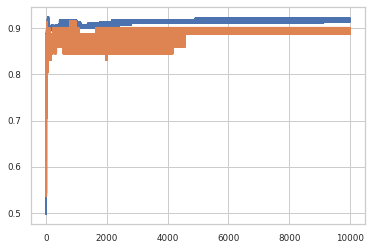

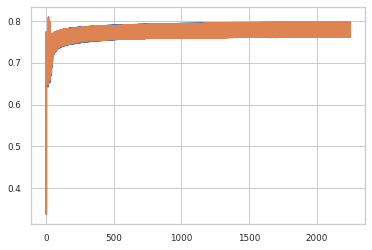

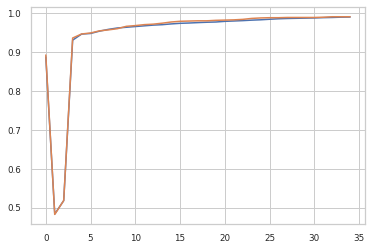

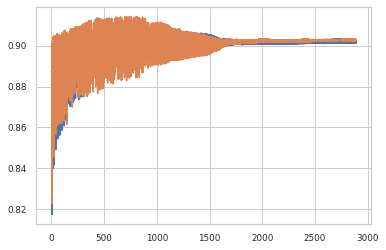

In [215]:
for i, ((X_train, y_train), (X_test, y_test)) in enumerate(zip(zip(X_trains, y_trains), zip(X_tests, y_tests))):
  log_reg = LogisticRegression(lr=test_rates[i], eps=0.01)
  log_reg.fit(X_train, y_train, save_accs_per_iteration=True, X_test=X_test, y_test=y_test)
  train_accs, test_accs = log_reg.getAccs()
  if (train_accs or test_accs):
    plt.plot(np.array(train_accs))
    plt.plot(np.array(test_accs))
    plt.show()

## Accuracy of models as function of the size of the dataset

In [0]:
sizes_to_train = list(range(5, 101, 5))

In [0]:
def graphAccuracyAsFunctionOfSizeOfDataSetKFold(X, y, sizes_to_train, lr, folds=5):
  kf = KFold(num_splits=folds)
  NB_test_accs = [[0 for x in range(len(sizes_to_train))] for y in range(folds)] 
  LR_test_accs = [[0 for x in range(len(sizes_to_train))] for y in range(folds)] 
  for i, (train_indices, test_indices) in enumerate(kf.get_splits(X, y)):
    X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]
    for j, size in enumerate(sizes_to_train):
      slice_ind = int((float(size) / 100) * X_train.shape[0])
      partition = list(range(0,slice_ind))
      log_reg = LogisticRegression(lr, eps=0.005)
      bayes = GaussianNaiveBayes()
      NB_test_acc = estimateTestAccuracyOfModel(X_train[partition], y_train[partition], bayes, X_test, y_test)
      LG_test_acc = estimateTestAccuracyOfModel(X_train[partition], y_train[partition], log_reg, X_test, y_test)
      NB_test_accs[i][j] = NB_test_acc
      LR_test_accs[i][j] = LG_test_acc
  plt.plot(np.array(sizes_to_train), np.mean(np.array(NB_test_accs), axis=0))
  plt.plot(np.array(sizes_to_train), np.mean(np.array(LR_test_accs), axis=0))
  plt.show()

20



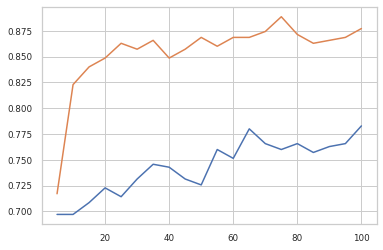

In [0]:
graphAccuracyAsFunctionOfSizeOfDataSetKFold(df_iono.values, y_iono, sizes_to_train, test_rates[0])

20



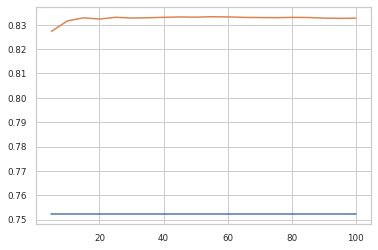

In [0]:
graphAccuracyAsFunctionOfSizeOfDataSetKFold(df_adult.values, y_adult, sizes_to_train, test_rates[1])

20



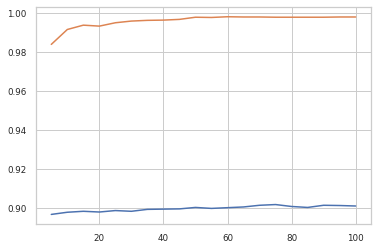

In [0]:
graphAccuracyAsFunctionOfSizeOfDataSetKFold(df_mushroom.values, y_mushroom, sizes_to_train, test_rates[2])

20



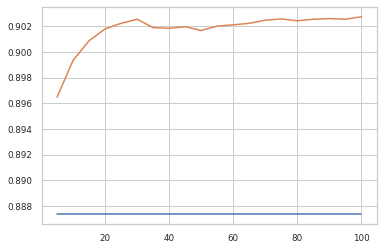

In [0]:
graphAccuracyAsFunctionOfSizeOfDataSetKFold(df_bank.values, y_bank, sizes_to_train, test_rates[3])

In [120]:
for i, ((X_train, y_train), (X_test, y_test)) in enumerate(zip(zip(X_trains, y_trains), zip(X_tests, y_tests))):
  NB_test_accs = []
  LR_test_accs = []
  for size in sizes_to_train:
    slice_ind = int((float(size) / 100) * X_train.shape[0])
    partition = list(range(0,slice_ind))
    log_reg = LogisticRegression(best_lr_rates[i], eps=0.005)
    bayes = GaussianNaiveBayes()
    NB_test_acc = estimateAccuracyOfModel(X_train[partition], y_train[partition], bayes, X_test, y_test)
    LG_test_acc = estimateAccuracyOfModel(X_train[partition], y_train[partition], log_reg, X_test, y_test)
    NB_test_accs.append(NB_test_acc)
    LR_test_accs.append(LG_test_acc)
  plt.plot(sizes_to_train, NB_test_accs)
  plt.show()

NameError: ignored

# Testing grounds


In [0]:
class ModelEvaluator:
  def __init__(self):
    self.metrics = []

  def _perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    N = 0
    P = 0

    for i in range(len(y_hat)): 
        if y_actual[i] == 1:
           P += 1
        else:
           N += 1
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(P, N, TP, FP, TN, FN)


  def _evaluate_acc(self, y, y_hat):
    self.accuracy = np.mean(y_hat==y)
    self.metrics.append(self.accuracy)

  def evaluate(self, y ,y_hat):
    self._per

    self._evaluate_acc(y,y_hat)
    
    return self.metrics
